# Exploratory Data Analysis

Import appropriate libraries

In [1]:
import numpy as np
import pandas as pd

Load the training dataset

In [37]:
dataset = pd.read_csv('training.csv', quoting = 3)

Inspect training data

In [38]:
print(list(dataset))
print(dataset.head())
print(dataset.describe())
print(dataset.shape[0])

['geohash6', 'day', 'timestamp', 'demand']
  geohash6  day timestamp    demand
0   qp03wc   18      20:0  0.020072
1   qp03pn   10     14:30  0.024721
2   qp09sw    9      6:15  0.102821
3   qp0991   32       5:0  0.088755
4   qp090q   15       4:0  0.074468
4206321


Check if there is any Null values in the dataset

In [39]:
dataset.isnull().values.any()

False

Test decoding geohash6 value

In [40]:
import geohash

latitude, longitude = geohash.decode(dataset["geohash6"].values[0])
print("geohash =", dataset["geohash6"].values[0], ", latitude =", latitude, ", longitude =", longitude)

latitude, longitude = geohash.decode(dataset["geohash6"].values[1])
print("geohash =", dataset["geohash6"].values[1], ", latitude =", latitude, ", longitude =", longitude)

latitude, longitude = geohash.decode(dataset["geohash6"].values[2])
print("geohash =", dataset["geohash6"].values[2], ", latitude =", latitude, ", longitude =", longitude)

geohash = qp03wc , latitude = -5.35308837890625 , longitude = 90.6536865234375
geohash = qp03pn , latitude = -5.41351318359375 , longitude = 90.6646728515625
geohash = qp09sw , latitude = -5.32562255859375 , longitude = 90.9063720703125


Decode the geohash into longitude and latitude and save them into the dataset

In [41]:
longitude = []
latitude = []

for g in dataset["geohash6"].values:
    la, lo = geohash.decode(g)
    latitude.append(la)
    longitude.append(lo)
    
dataset["latitude"] = latitude
dataset["longitude"] = longitude

print(len(latitude))
print(len(longitude))
print(list(dataset))

4206321
4206321
['geohash6', 'day', 'timestamp', 'demand', 'latitude', 'longitude']


Check the max and min for day

In [42]:
print(dataset['day'].min())
print(dataset['day'].max())

1
61


Check if all the days are present

In [43]:
uniquedays = dataset['day'].unique().tolist()
uniquedays.sort()
print(uniquedays)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]


Check the max and min for demand

In [44]:
print(dataset['demand'].min())
print(dataset['demand'].max())

3.0922172375050822e-09
1.0


There is no 0 in demand, as it was mentioned in the FAQ, that all missing data should be treated as 0.

As each timestamp are separated by 15-min interval, check if all the timestamps from 00:00 to 23:45 are present

In [45]:
uniquetime = dataset['timestamp'].unique().tolist()
uniquetime.sort()
print(uniquetime)
print(len(uniquetime))

['0:0', '0:15', '0:30', '0:45', '10:0', '10:15', '10:30', '10:45', '11:0', '11:15', '11:30', '11:45', '12:0', '12:15', '12:30', '12:45', '13:0', '13:15', '13:30', '13:45', '14:0', '14:15', '14:30', '14:45', '15:0', '15:15', '15:30', '15:45', '16:0', '16:15', '16:30', '16:45', '17:0', '17:15', '17:30', '17:45', '18:0', '18:15', '18:30', '18:45', '19:0', '19:15', '19:30', '19:45', '1:0', '1:15', '1:30', '1:45', '20:0', '20:15', '20:30', '20:45', '21:0', '21:15', '21:30', '21:45', '22:0', '22:15', '22:30', '22:45', '23:0', '23:15', '23:30', '23:45', '2:0', '2:15', '2:30', '2:45', '3:0', '3:15', '3:30', '3:45', '4:0', '4:15', '4:30', '4:45', '5:0', '5:15', '5:30', '5:45', '6:0', '6:15', '6:30', '6:45', '7:0', '7:15', '7:30', '7:45', '8:0', '8:15', '8:30', '8:45', '9:0', '9:15', '9:30', '9:45']
96


As the timestamp are strings, it would be easier to process it later if we normalize it to a increasing integer starting from 0. We can also do the same normalization across the whole 61 days. We can save the normalized values back into the dataset for future usage.

In [46]:
row = dataset.shape[0]

normalizedTime = []
normalizedDayTime = []

for i in range(row):
    time = dataset["timestamp"][i].split(":")
    a = (int(time[0]) * 4) + (int(time[1]) / 15)
    normalizedTime.append(a)
    b = (dataset["day"][i]-1) * len(uniquetime) + a
    normalizedDayTime.append(b)

dataset["normalizedTime"] = normalizedTime
dataset["normalizedDayTime"] = normalizedDayTime

print(len(normalizedTime))
print(len(normalizedDayTime))
print(list(dataset))

4206321
4206321
['geohash6', 'day', 'timestamp', 'demand', 'latitude', 'longitude', 'normalizedTime', 'normalizedDayTime']


Check how many unique latitudes and longitudes are there

In [47]:
uniquelatitude = dataset['latitude'].unique().tolist()
uniquelatitude.sort()
print(uniquelatitude)

uniquelongitude = dataset['longitude'].unique().tolist()
uniquelongitude.sort()
print(uniquelongitude)

[-5.48492431640625, -5.47943115234375, -5.47393798828125, -5.46844482421875, -5.46295166015625, -5.45745849609375, -5.45196533203125, -5.44647216796875, -5.44097900390625, -5.43548583984375, -5.42999267578125, -5.42449951171875, -5.41900634765625, -5.41351318359375, -5.40802001953125, -5.40252685546875, -5.39703369140625, -5.39154052734375, -5.38604736328125, -5.38055419921875, -5.37506103515625, -5.36956787109375, -5.36407470703125, -5.35858154296875, -5.35308837890625, -5.34759521484375, -5.34210205078125, -5.33660888671875, -5.33111572265625, -5.32562255859375, -5.32012939453125, -5.31463623046875, -5.30914306640625, -5.30364990234375, -5.29815673828125, -5.29266357421875, -5.28717041015625, -5.28167724609375, -5.27618408203125, -5.27069091796875, -5.26519775390625, -5.25970458984375, -5.25421142578125, -5.24871826171875, -5.24322509765625, -5.23773193359375]
[90.5877685546875, 90.5987548828125, 90.6097412109375, 90.6207275390625, 90.6317138671875, 90.6427001953125, 90.6536865234375

Check the numbers of unique latitudes and unique longitudes

In [48]:
numlatitude = len(uniquelatitude)
print(numlatitude)

numlongitude = len(uniquelongitude)
print(numlongitude)

46
36


Check if the different geohashes in the training datasets are actually adjacent to each other, that is to check if all unique latitudes and longitudes have same differences

In [49]:
for i in range(len(uniquelatitude)-1):
    diff = uniquelatitude[i+1] - uniquelatitude[i]
    print(diff)

0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625
0.0054931640625


In [50]:
for i in range(len(uniquelongitude)-1):
    diff = uniquelongitude[i+1] - uniquelongitude[i]
    print(diff)

0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125
0.010986328125


Since all the sorted latitudes and longitudes have the same differences between each units, that means we can also normalize the latitudes and longitudes into X and Y coordinates

In [53]:
difflatitude = uniquelatitude[1] - uniquelatitude[0]
minlatitude = uniquelatitude[0]

difflongitude = uniquelongitude[1] - uniquelongitude[0]
minlongitude = uniquelongitude[0]

Xcoord = (dataset['longitude'].values - minlongitude) / difflongitude
Ycoord = (dataset['latitude'].values - minlatitude) / difflatitude

dataset["Xcoord"] = Xcoord
dataset["Ycoord"] = Ycoord

print(list(dataset))

['geohash6', 'day', 'timestamp', 'demand', 'latitude', 'longitude', 'normalizedTime', 'normalizedDayTime', 'Xcoord', 'Ycoord']


Convert day into day of week by modulus the day number by 7

In [54]:
dayofweek = dataset['day'].values % 7
dataset["dayOfWeek"] = dayofweek

print(list(dataset))

['geohash6', 'day', 'timestamp', 'demand', 'latitude', 'longitude', 'normalizedTime', 'normalizedDayTime', 'Xcoord', 'Ycoord', 'dayOfWeek']


Check the frequency of each unique values in each columns

In [56]:
col = dataset.shape[1]

res = {col:dataset[col].value_counts() for col in dataset.columns}
print(res)

{'geohash6': qp03xw    5846
qp03yb    5846
qp03wf    5846
qp03wz    5846
qp0987    5845
qp03xm    5845
qp03qg    5845
qp03w9    5845
qp03wg    5845
qp092m    5845
qp03zv    5845
qp03qm    5845
qp03xx    5845
qp09e5    5845
qp098j    5844
qp03qf    5844
qp03xh    5844
qp03xy    5844
qp03z0    5844
qp03zt    5844
qp09bh    5844
qp03xz    5844
qp092n    5844
qp03wy    5844
qp03xs    5844
qp03pr    5844
qp03xv    5844
qp03wu    5844
qp098k    5844
qp098n    5844
          ... 
qp09kg       6
qp09by       6
qp06nw       5
qp09n5       5
qp09v5       5
qp09m7       5
qp09h3       4
qp0d5k       4
qp09dz       4
qp08g5       4
qp09wn       4
qp09w1       4
qp09te       2
qp02yu       2
qp09m6       2
qp091h       2
qp0919       2
qp09s5       2
qp09nj       2
qp09eg       2
qp091j       1
qp09t7       1
qp09mv       1
qp0d45       1
qp0d4m       1
qp09tg       1
qp08fs       1
qp09v9       1
qp03yn       1
qp092b       1
Name: geohash6, Length: 1329, dtype: int64, 'day': 39    76097
45    756

Check if there is any duplicated row but having a different demand data (eg: same day, time, geohash6 but with different demand)

In [57]:
df = dataset.drop(columns=['demand'])
duplicateRowsDF = df[df.duplicated()]
print(duplicateRowsDF)
print(len(duplicateRowsDF))

Empty DataFrame
Columns: [geohash6, day, timestamp, latitude, longitude, normalizedTime, normalizedDayTime, Xcoord, Ycoord, dayOfWeek]
Index: []
0


To analyze the general pattern of demand over time, we will plot the demand of a geohash over the course of 61 days

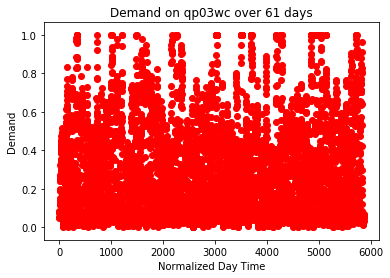

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

geo1 = dataset[(dataset["geohash6"]=="qp03wc")]
plt.title('Demand on qp03wc over 61 days')
plt.xlabel('Normalized Day Time')
plt.ylabel('Demand')
plt.scatter(geo1["normalizedDayTime"].values, geo1["demand"].values, color = 'red')

Plot the demand for that geohash over day 1

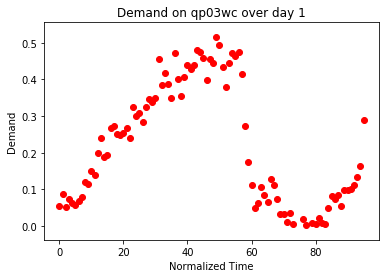

In [62]:
geo1 = dataset[(dataset["geohash6"]=="qp03wc")]
geo1day1 = geo1[(geo1["day"].values == 1.0)]
plt.title('Demand on qp03wc over day 1')
plt.xlabel('Normalized Time')
plt.ylabel('Demand')
plt.scatter(geo1day1["normalizedTime"].values, geo1day1["demand"].values, color = 'red')

Plot the demands for the same geohash over day 2, day 7, day 8, day 14 and day 15 to see if the plots follow any pattern for the same day of week (eg: monday, tuesday, etc...)

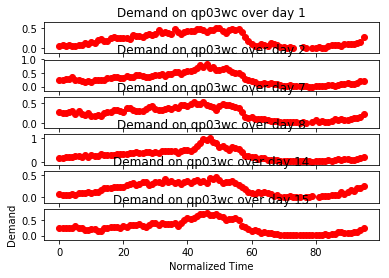

In [67]:
fig = plt.figure()

geo1day1 = geo1[(geo1["day"].values == 1.0)]
ax = fig.add_subplot(6,1,1)
ax.set_title('Demand on qp03wc over day 1')
ax.scatter(geo1day1["normalizedTime"].values, geo1day1["demand"].values, color = 'red')

geo1day2 = geo1[(geo1["day"].values == 2.0)]
ax = fig.add_subplot(6,1,2)
ax.set_title('Demand on qp03wc over day 2')
ax.scatter(geo1day2["normalizedTime"].values, geo1day2["demand"].values, color = 'red')

geo1day7 = geo1[(geo1["day"].values == 7.0)]
ax = fig.add_subplot(6,1,3)
ax.set_title('Demand on qp03wc over day 7')
ax.scatter(geo1day7["normalizedTime"].values, geo1day7["demand"].values, color = 'red')

geo1day8 = geo1[(geo1["day"].values == 8.0)]
ax = fig.add_subplot(6,1,4)
ax.set_title('Demand on qp03wc over day 8')
ax.scatter(geo1day8["normalizedTime"].values, geo1day8["demand"].values, color = 'red')

geo1day14 = geo1[(geo1["day"].values == 14.0)]
ax = fig.add_subplot(6,1,5)
ax.set_title('Demand on qp03wc over day 14')
ax.scatter(geo1day14["normalizedTime"].values, geo1day14["demand"].values, color = 'red')

geo1day15 = geo1[(geo1["day"].values == 15.0)]
ax = fig.add_subplot(6,1,6)
ax.set_title('Demand on qp03wc over day 15')
plt.scatter(geo1day15["normalizedTime"].values, geo1day15["demand"].values, color = 'red')

plt.xlabel('Normalized Time')
plt.ylabel('Demand')
plt.show()

Now we try to analyse the demand from a different point of view. Instead of plotting the demands of a specific geohash over time, we can also try to plot the demands of all geohash in 1 specific timestamp. We now plot the demands from day 1 time 00:00

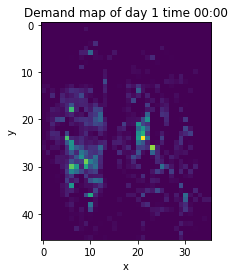

In [71]:
d1t0 = np.zeros(shape=(int(dataset["Ycoord"].values.max()+1),int(dataset["Xcoord"].values.max()+1)))
day1 = dataset[(dataset["day"].values == 1)]
day1time0 = day1[(day1["normalizedTime"].values == 0)]
for i in range(len(day1time0)):
    X = day1time0["Xcoord"].values[i]
    Y = day1time0["Ycoord"].values[i]
    d1t0[int(Y)][int(X)] = day1time0["demand"].values[i]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Demand map of day 1 time 00:00')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(d1t0)

Plot demands from day 1 time 12:00

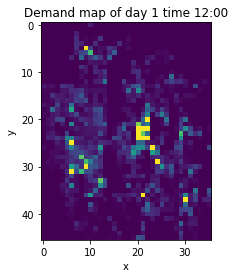

In [72]:
plot = np.zeros(shape=(int(dataset["Ycoord"].values.max()+1),int(dataset["Xcoord"].values.max()+1)))
day1 = dataset[(dataset["day"].values == 1)]
day1time0 = day1[(day1["normalizedTime"].values == 48)]
for i in range(len(day1time0)):
    X = day1time0["Xcoord"].values[i]
    Y = day1time0["Ycoord"].values[i]
    plot[int(Y)][int(X)] = day1time0["demand"].values[i]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Demand map of day 1 time 12:00')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(plot)

Plot demands from day 2 time 12:00

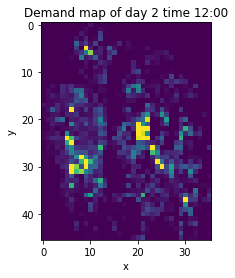

In [73]:
plot = np.zeros(shape=(int(dataset["Ycoord"].values.max()+1),int(dataset["Xcoord"].values.max()+1)))
day1 = dataset[(dataset["day"].values == 2)]
day1time0 = day1[(day1["normalizedTime"].values == 48)]
for i in range(len(day1time0)):
    X = day1time0["Xcoord"].values[i]
    Y = day1time0["Ycoord"].values[i]
    plot[int(Y)][int(X)] = day1time0["demand"].values[i]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Demand map of day 2 time 12:00')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(plot)